In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(14, 8))
tickers = ['QCOM', 'TM', 'GRMN', 'JASO', 'INTC', 'ADM', 'SWM', 'CG', 
           'VGLT', 'VGIT', 'VGSH', 'VTI', 'APO', 'JNPR', 
           'CHKP', 'IBM', 'VT', 'VGT', 'VGK', 'VEA', 'VTIP', 'SPY', 'GLD', 'VGIT',
          'VGLT', 'VGSH']

In [2]:
# different stocks have different timeframe of existance 
def get_len(file_list):
    lengths = {}
    for file in file_list:
        # use only dates column
        data = pd.read_csv(file + ".csv", usecols= [0])
        lengths[file] = len(data)
    
    return pd.Series(lengths).sort_values(ascending=False)
    

In [3]:
length_data = get_len(tickers)
length_data

SPY     6270
GLD     3295
VTI     3022
SWM     3021
CHKP    3021
GRMN    3021
IBM     3021
INTC    3021
JNPR    3021
QCOM    3021
ADM     3021
TM      3021
JASO    2690
VEA     2621
VGK     2348
VGT     2348
VT      2348
VGIT    1986
VGSH    1986
VGLT    1959
APO     1646
CG      1370
VTIP    1262
dtype: int64

In [4]:
# tickers we are going to use
tickers_to_use = length_data[length_data > 2000]
tickers_to_use

SPY     6270
GLD     3295
VTI     3022
SWM     3021
CHKP    3021
GRMN    3021
IBM     3021
INTC    3021
JNPR    3021
QCOM    3021
ADM     3021
TM      3021
JASO    2690
VEA     2621
VGK     2348
VGT     2348
VT      2348
dtype: int64

In [5]:
def read_file(file_list):
    # make the data rangea s wide as possibe
    start_date = "1900-01-01"
    end_date = "2017-12-31"
    dates = pd.date_range(start_date, end_date)
    df = pd.DataFrame(index=dates)
    for file in file_list:
        # using only "date" and "Adj Close" columns  
        data = pd.read_csv(file + ".csv", index_col=0, parse_dates=True, usecols=[0, 5]) 
        data = data.rename(columns={"Adj Close": file})
        # change anything which is not a float to NaN
        data = pd.to_numeric(data[file], errors="coerce")
        df = df.join(data, how="inner")
        df = df.dropna()
    return df

In [6]:
df_final = read_file(list(tickers_to_use.index))

In [7]:
df_final.head()

,SPY,GLD,VTI,SWM,CHKP,GRMN,IBM,INTC,JNPR,QCOM,ADM,TM,JASO,VEA,VGK,VGT,VT
2008-06-26,105.612068,90.610001,53.366161,6.396492,23.840000,27.902447,96.967064,15.958439,21.289864,36.549957,26.165108,77.757286,89.250000,31.789949,43.556610,48.541286,40.661331
2008-06-27,105.035553,91.470001,53.291477,6.308024,23.959999,28.837105,96.102516,15.884527,21.517973,36.987476,26.495092,77.617393,87.599998,31.947216,43.637035,48.314545,40.595734
2008-06-30,105.406158,91.400002,53.183598,6.481110,23.670000,28.000496,94.885727,15.877134,21.080769,35.950375,27.163094,77.345863,84.250000,32.149403,43.965389,47.851982,40.628540
2008-07-01,105.735626,92.660004,53.432556,6.254176,23.900000,28.065849,95.478111,15.943661,20.672081,37.125217,26.800922,77.066116,78.949997,31.827402,43.335480,47.942688,40.267677
2008-07-02,103.923683,93.169998,52.337181,5.900310,23.340000,27.889376,95.342010,15.470599,20.786131,36.501343,25.883415,75.206512,72.699997,31.288200,42.759201,47.117340,39.677193


In [8]:
# make every stock start from 1 
def normalize(dataframe):
    return dataframe / dataframe.iloc[0, :]

In [9]:
df_final_normalized = normalize(df_final)

In [10]:
df_final_normalized.head()

,SPY,GLD,VTI,SWM,CHKP,GRMN,IBM,INTC,JNPR,QCOM,ADM,TM,JASO,VEA,VGK,VGT,VT
2008-06-26,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2008-06-27,0.994541,1.009491,0.998601,0.986169,1.005034,1.033497,0.991084,0.995368,1.010714,1.011970,1.012612,0.998201,0.981513,1.004947,1.001846,0.995329,0.998387
2008-06-30,0.998050,1.008719,0.996579,1.013229,0.992869,1.003514,0.978536,0.994905,0.990179,0.983596,1.038142,0.994709,0.943978,1.011307,1.009385,0.985800,0.999194
2008-07-01,1.001170,1.022624,1.001244,0.977751,1.002517,1.005856,0.984645,0.999074,0.970982,1.015739,1.024300,0.991111,0.884594,1.001178,0.994923,0.987668,0.990319
2008-07-02,0.984013,1.028253,0.980718,0.922429,0.979027,0.999532,0.983241,0.969431,0.976339,0.998670,0.989234,0.967196,0.814566,0.984217,0.981693,0.970665,0.975797


In [11]:
def plot(dataframe):
    dataframe.plot()
    plt.xlabel("Date")
    plt.ylabel("Normalized Price")
    plt.title("Adjusted Close")
    plt.grid()

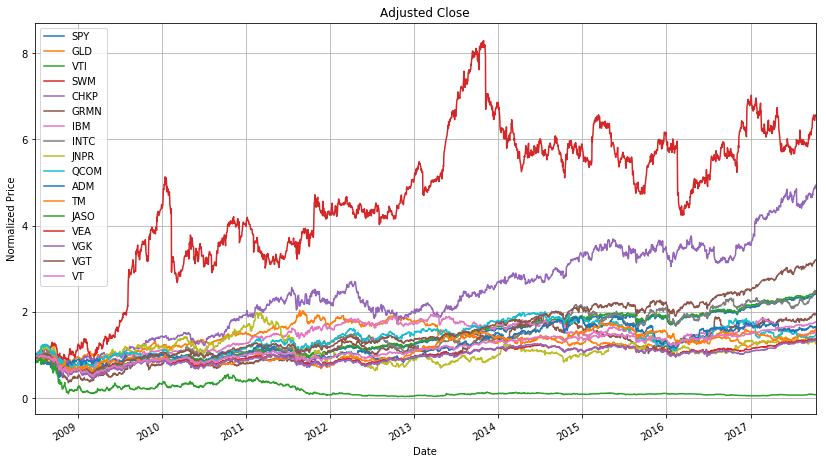

In [12]:
plot(df_final_normalized)

In [13]:
# correlation on daily returns 
corr_table = df_final_normalized.pct_change().corr()
corr_table

,SPY,GLD,VTI,SWM,CHKP,GRMN,IBM,INTC,JNPR,QCOM,ADM,TM,JASO,VEA,VGK,VGT,VT
SPY,1.000000,0.020924,0.992305,0.525152,0.602412,0.534640,0.707229,0.725826,0.600747,0.643243,0.664936,0.688540,0.453392,0.909468,0.893488,0.921932,0.940039
GLD,0.020924,1.000000,0.031477,-0.007631,-0.011345,0.036421,0.002666,0.011570,0.020460,0.009362,0.078998,0.015305,0.082722,0.108334,0.107876,0.005359,0.096735
VTI,0.992305,0.031477,1.000000,0.542244,0.606715,0.548289,0.707242,0.725660,0.612840,0.642812,0.660911,0.683531,0.465758,0.907048,0.892718,0.929068,0.943915
SWM,0.525152,-0.007631,0.542244,1.000000,0.327981,0.299805,0.356562,0.383752,0.360386,0.349079,0.333056,0.378305,0.257199,0.479606,0.477027,0.498957,0.501331
CHKP,0.602412,-0.011345,0.606715,0.327981,1.000000,0.367977,0.478657,0.499581,0.428847,0.451575,0.384366,0.432941,0.303491,0.552039,0.549164,0.640781,0.574198
GRMN,0.534640,0.036421,0.548289,0.299805,0.367977,1.000000,0.400810,0.441728,0.359630,0.385238,0.367548,0.363236,0.268724,0.497013,0.489562,0.545718,0.531208
IBM,0.707229,0.002666,0.707242,0.356562,0.478657,0.400810,1.000000,0.569249,0.436047,0.497580,0.458239,0.514212,0.288086,0.665314,0.657221,0.725975,0.679656
INTC,0.725826,0.011570,0.725660,0.383752,0.499581,0.441728,0.569249,1.000000,0.500711,0.553308,0.475098,0.519419,0.359507,0.660262,0.652093,0.779824,0.679282
JNPR,0.600747,0.020460,0.612840,0.360386,0.428847,0.359630,0.436047,0.500711,1.000000,0.485076,0.387094,0.420175,0.319338,0.552456,0.554128,0.642801,0.592786
QCOM,0.643243,0.009362,0.642812,0.349079,0.451575,0.385238,0.497580,0.553308,0.485076,1.000000,0.442378,0.459541,0.283323,0.585773,0.579426,0.689533,0.607667


In [14]:
# check for negative correlation
corr_table["SPY"] < 0

SPY     False
GLD     False
VTI     False
SWM     False
CHKP    False
GRMN    False
IBM     False
INTC    False
JNPR    False
QCOM    False
ADM     False
TM      False
JASO    False
VEA     False
VGK     False
VGT     False
VT      False
Name: SPY, dtype: bool

In [15]:
corr_table[corr_table < 0]

,SPY,GLD,VTI,SWM,CHKP,GRMN,IBM,INTC,JNPR,QCOM,ADM,TM,JASO,VEA,VGK,VGT,VT
SPY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GLD,NaN,NaN,NaN,-0.007631,-0.011345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VTI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWM,NaN,-0.007631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHKP,NaN,-0.011345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRMN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IBM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JNPR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QCOM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
daily_returns = df_final_normalized.pct_change()
daily_returns.head()

,SPY,GLD,VTI,SWM,CHKP,GRMN,IBM,INTC,JNPR,QCOM,ADM,TM,JASO,VEA,VGK,VGT,VT
2008-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-06-27,-0.005459,0.009491,-0.001399,-0.013831,0.005034,0.033497,-0.008916,-0.004632,0.010714,0.011970,0.012612,-0.001799,-0.018487,0.004947,0.001846,-0.004671,-0.001613
2008-06-30,0.003528,-0.000765,-0.002024,0.027439,-0.012103,-0.029012,-0.012661,-0.000465,-0.020318,-0.028039,0.025212,-0.003498,-0.038242,0.006329,0.007525,-0.009574,0.000808
2008-07-01,0.003126,0.013786,0.004681,-0.035015,0.009717,0.002334,0.006243,0.004190,-0.019387,0.032680,-0.013333,-0.003617,-0.062908,-0.010016,-0.014327,0.001896,-0.008882
2008-07-02,-0.017137,0.005504,-0.020500,-0.056581,-0.023431,-0.006288,-0.001425,-0.029671,0.005517,-0.016805,-0.034234,-0.024130,-0.079164,-0.016941,-0.013298,-0.017215,-0.014664


In [17]:
# numpy.polyfit does not work properly 
# so using sklearn
import sklearn
np.set_printoptions(suppress=True)
from sklearn.linear_model import LinearRegression

In [18]:
def regression(dataframe):
    dict_params = {}
    lin_reg = LinearRegression()
    # need to get rid of NaN for sklearn
    x = dataframe["SPY"][1:].values.reshape(-1,1)
    for column in dataframe:
        y = dataframe[column][1:].values.reshape(-1,1)
        lin_reg.fit(x, y)
        # ticker : beta, alpha
        dict_params[column] = np.float64(lin_reg.coef_), np.float64(lin_reg.intercept_)
    return dict_params

In [19]:
coefficients = regression(daily_returns)
coefficients

{'ADM': (1.0445137131606876, -5.8647107308097462e-05),
 'CHKP': (0.77317151499443293, 0.00046491239851190842),
 'GLD': (0.019386173730667668, 0.00019305242973714608),
 'GRMN': (0.95135665092579724, 0.00011414271161307784),
 'IBM': (0.7550130776492997, -7.251689952842387e-05),
 'INTC': (0.99024212325014804, 8.4959462472128475e-05),
 'JASO': (1.7998677571128672, -0.00063508161782013144),
 'JNPR': (1.1528189449288877, -0.00012197382759035084),
 'QCOM': (0.95817149830055337, -8.6299110294896231e-05),
 'SPY': (0.99999999999999967, 1.6263032587282567e-19),
 'SWM': (1.010907922624553, 0.0006558403387499467),
 'TM': (0.91089951942458558, -7.4698118035542273e-05),
 'VEA': (1.0803354634875755, -0.00024090035919365778),
 'VGK': (1.1823761777321868, -0.00026866549667314957),
 'VGT': (0.96006167659557806, 0.00014705233665863944),
 'VT': (1.033577208174888, -0.00013131467377371623),
 'VTI': (0.99372298543983317, 1.1677943409952728e-05)}

In [20]:
def plot_regerssion(coef, dataframe):
    for i in coef.keys():
        if i == "SPY":
            pass
        else:
            slope = coef.get(i)[0]
            intercept = coef.get(i)[1]
            plt.scatter(dataframe["SPY"], dataframe[i], s = 15)
            plt.plot(dataframe["SPY"], slope * dataframe["SPY"] + intercept, "-", color='r')
            plt.xlabel("SPY")
            plt.ylabel(i)
            plt.title("Linear Regression")
            plt.grid()
            plt.show()
            print("Beta: " + str(round(coef.get(i)[0], 2)), \
                  "Alpha: " + str(round(coef.get(i)[1], 5)))
            print(i + " correlation: " + str(np.corrcoef(dataframe["SPY"].iloc[1:], \
                                              dataframe[i].iloc[1:])[0][1]))

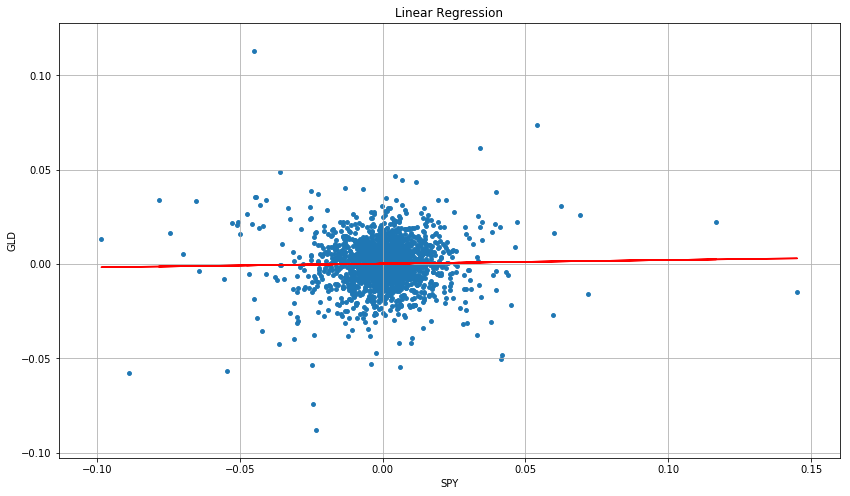

Beta: 0.02 Alpha: 0.00019
GLD correlation: 0.0209239365199


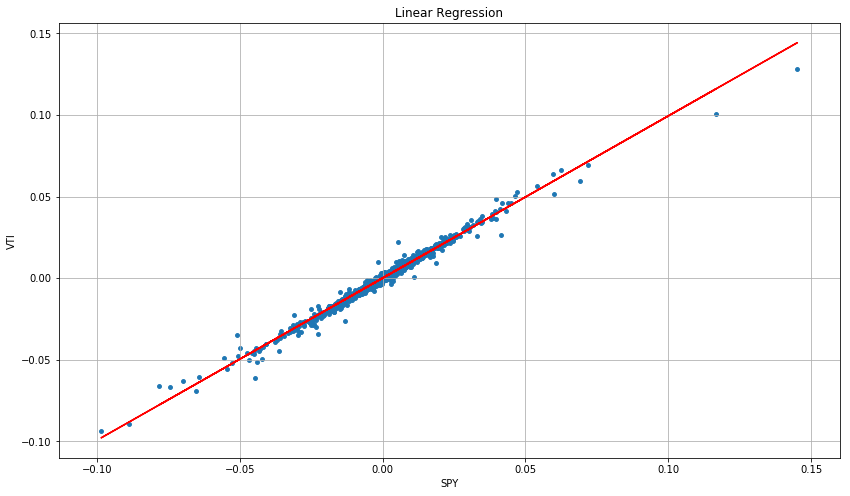

Beta: 0.99 Alpha: 1e-05
VTI correlation: 0.992305071107


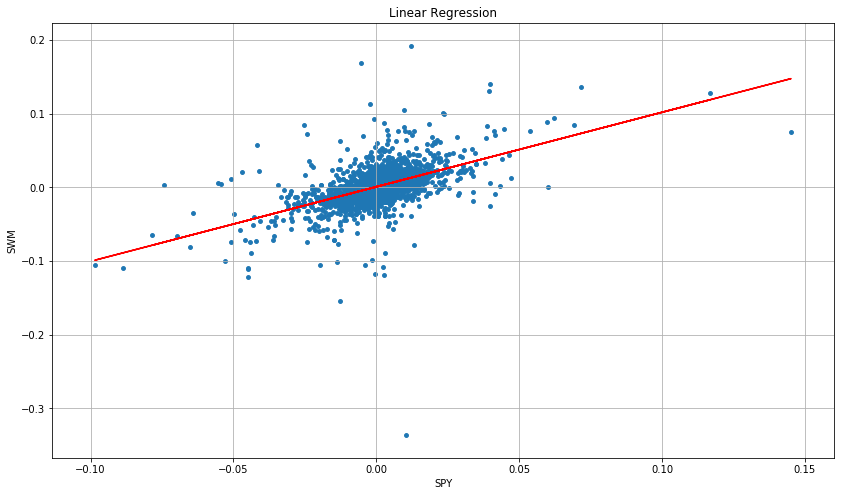

Beta: 1.01 Alpha: 0.00066
SWM correlation: 0.525152237898


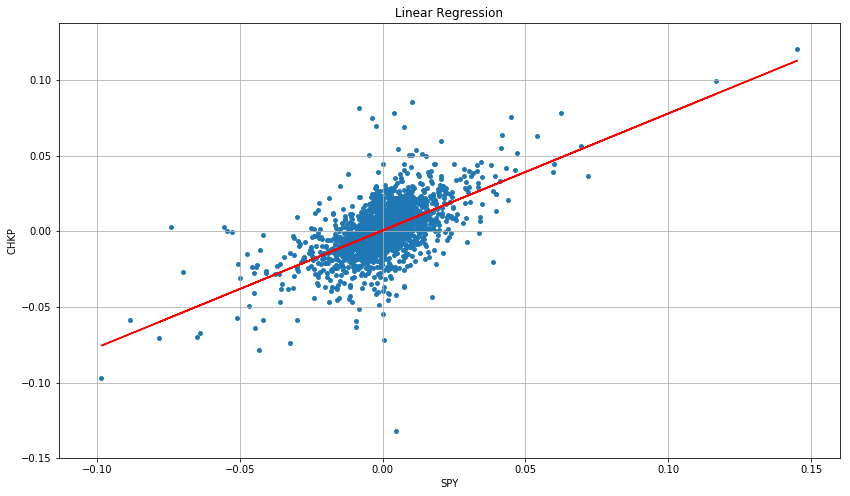

Beta: 0.77 Alpha: 0.00046
CHKP correlation: 0.602411572198


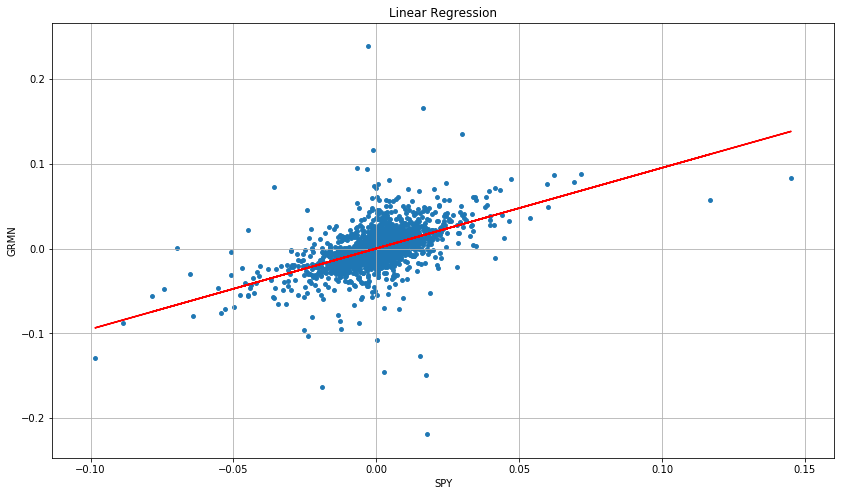

Beta: 0.95 Alpha: 0.00011
GRMN correlation: 0.5346403107


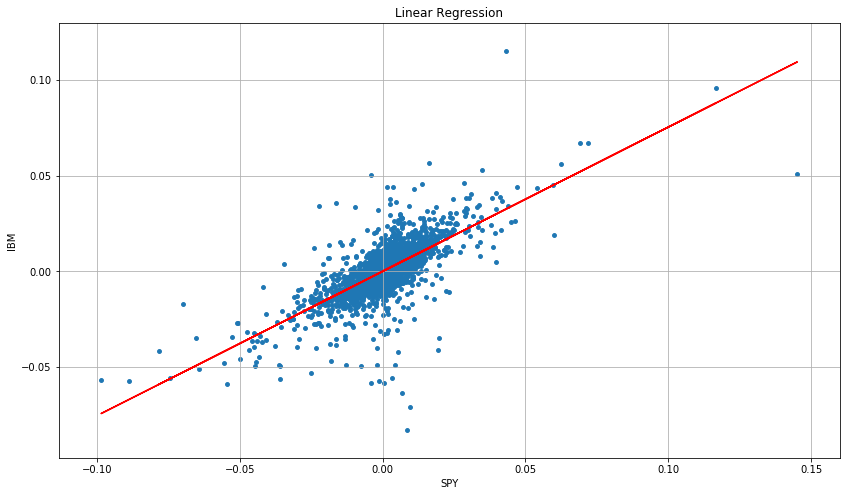

Beta: 0.76 Alpha: -7e-05
IBM correlation: 0.707229108555


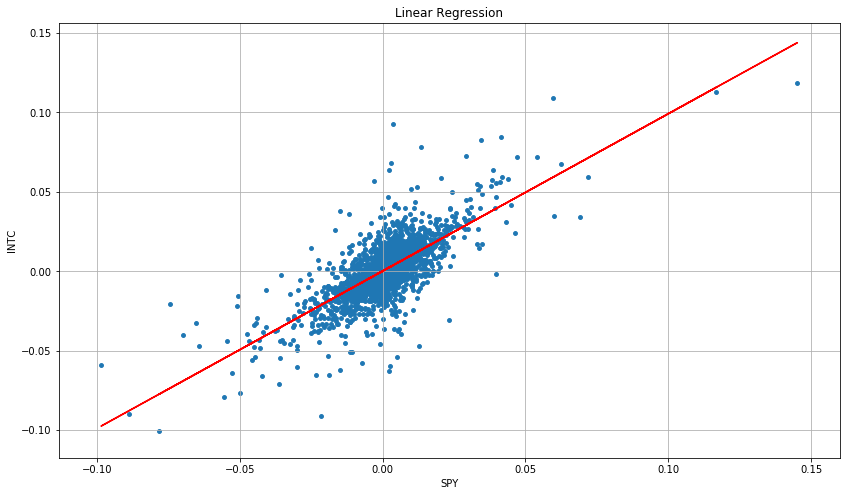

Beta: 0.99 Alpha: 8e-05
INTC correlation: 0.725825639529


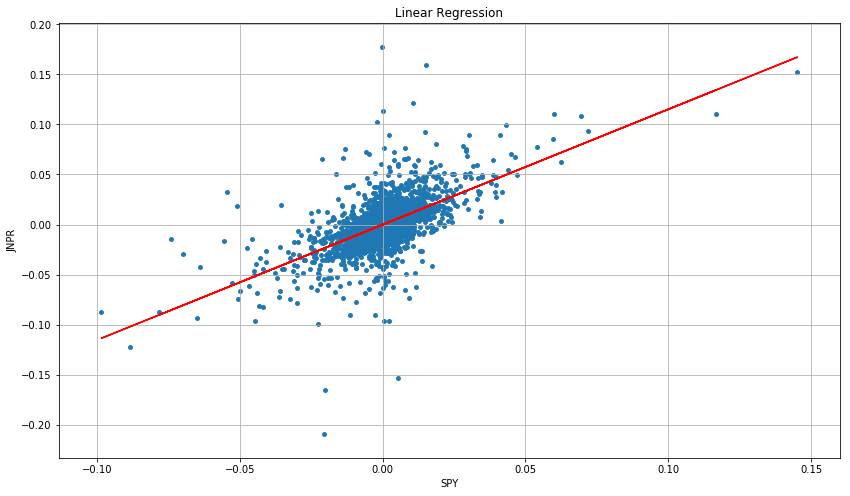

Beta: 1.15 Alpha: -0.00012
JNPR correlation: 0.600746640216


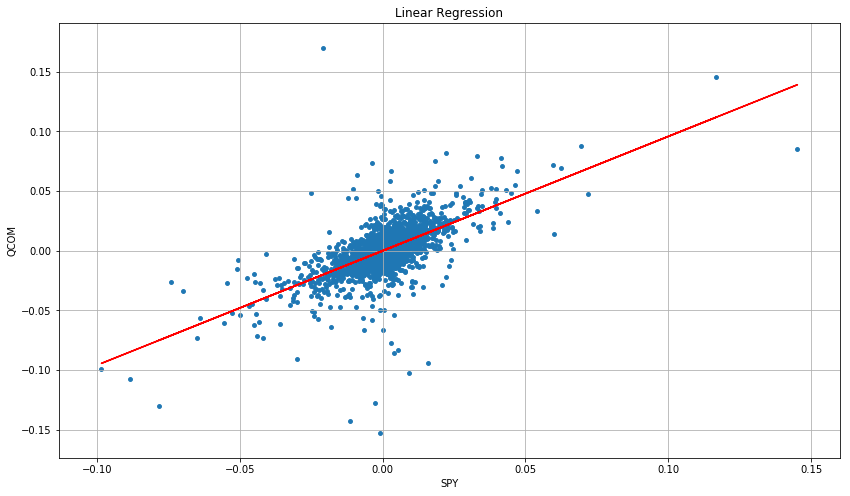

Beta: 0.96 Alpha: -9e-05
QCOM correlation: 0.643242758948


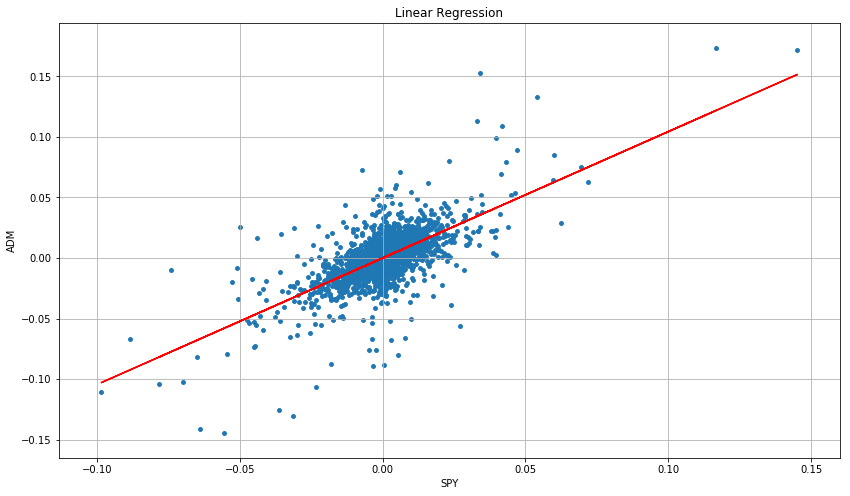

Beta: 1.04 Alpha: -6e-05
ADM correlation: 0.66493623369


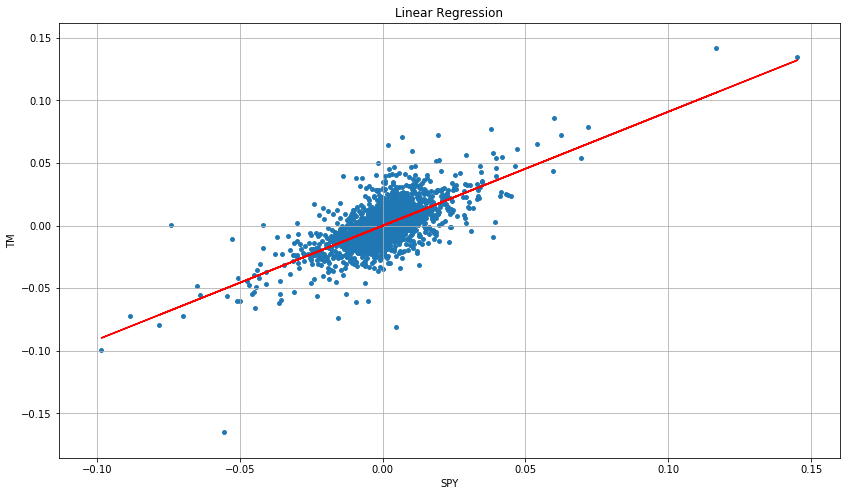

Beta: 0.91 Alpha: -7e-05
TM correlation: 0.688540477828


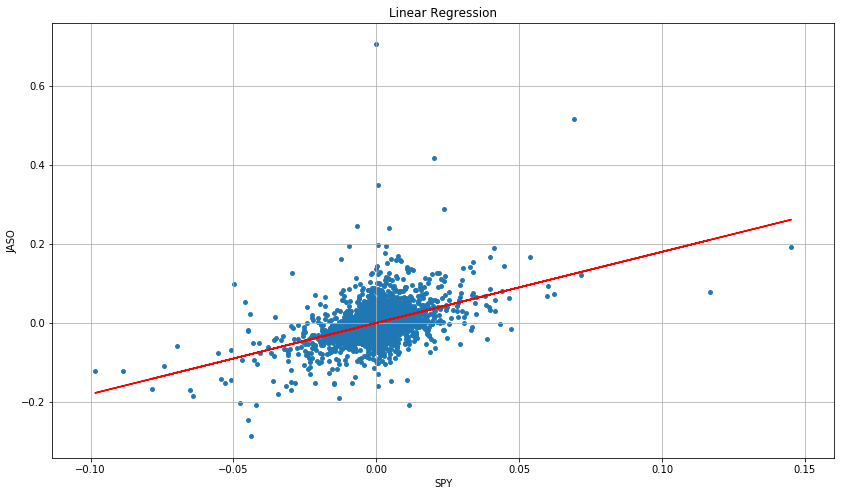

Beta: 1.8 Alpha: -0.00064
JASO correlation: 0.453391714016


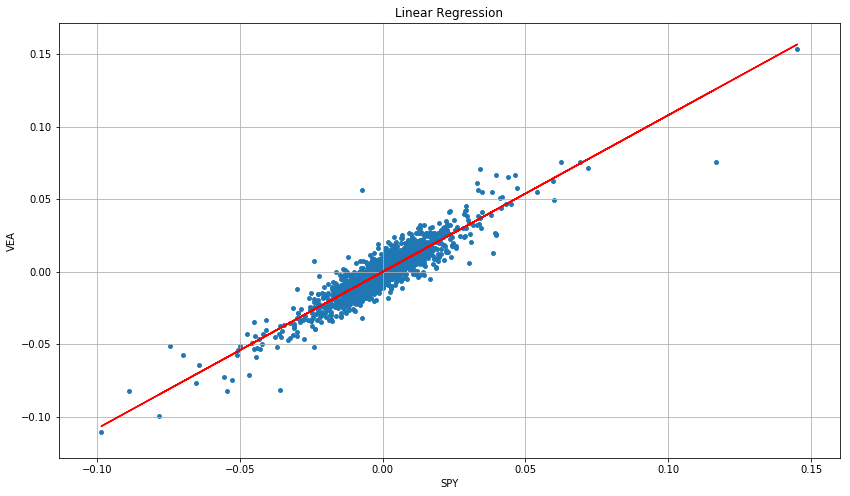

Beta: 1.08 Alpha: -0.00024
VEA correlation: 0.909468371793


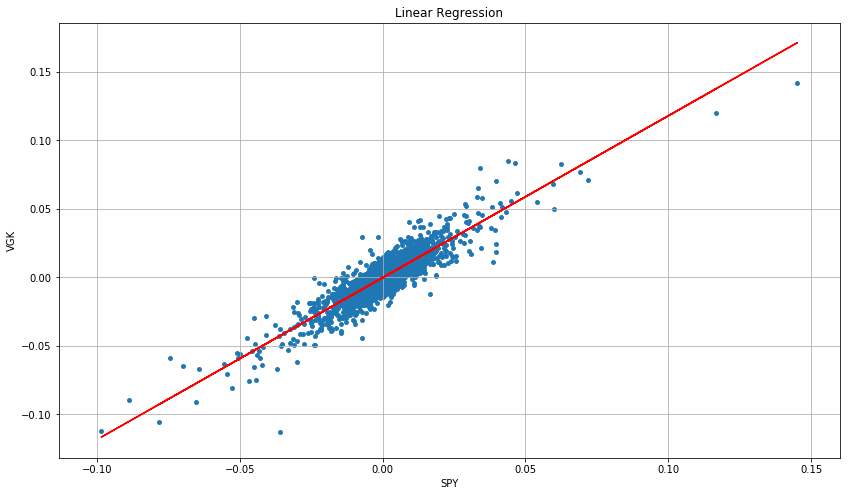

Beta: 1.18 Alpha: -0.00027
VGK correlation: 0.893487658186


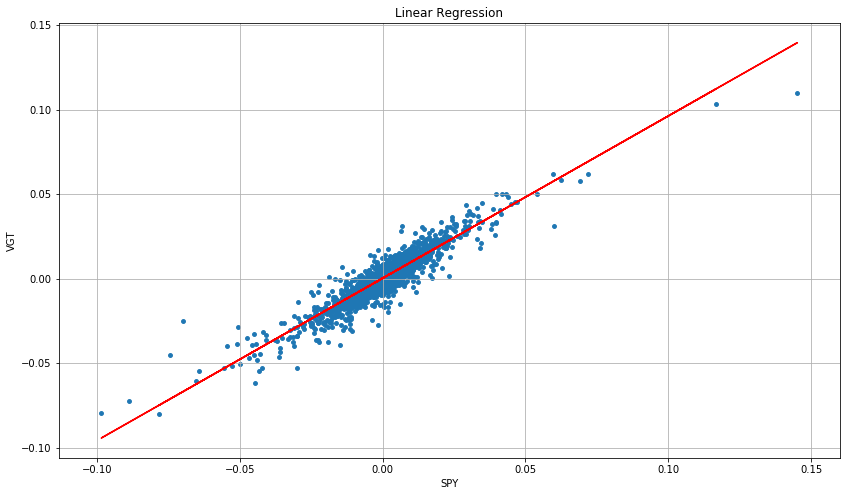

Beta: 0.96 Alpha: 0.00015
VGT correlation: 0.921932174574


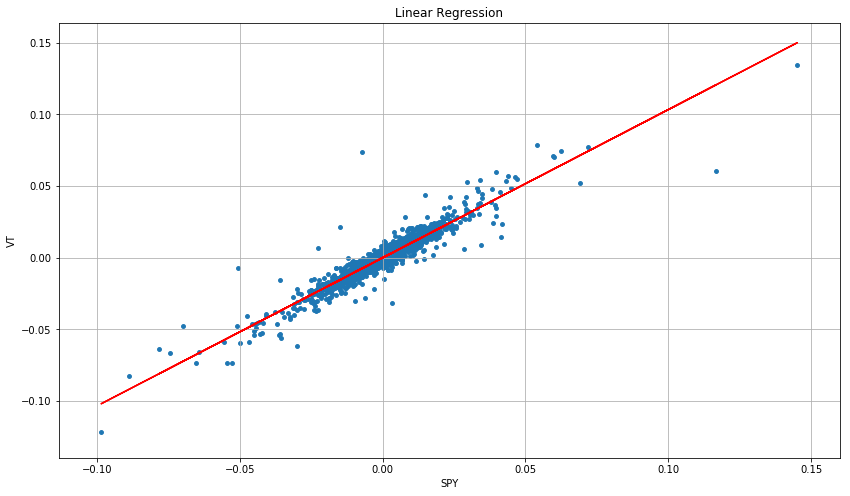

Beta: 1.03 Alpha: -0.00013
VT correlation: 0.940039348801


In [21]:
plot_regerssion(coefficients, daily_returns)

In [22]:
length_data

SPY     6270
GLD     3295
VTI     3022
SWM     3021
CHKP    3021
GRMN    3021
IBM     3021
INTC    3021
JNPR    3021
QCOM    3021
ADM     3021
TM      3021
JASO    2690
VEA     2621
VGK     2348
VGT     2348
VT      2348
VGIT    1986
VGSH    1986
VGLT    1959
APO     1646
CG      1370
VTIP    1262
dtype: int64

In [23]:
df_all = read_file(list(length_data.index))

In [24]:
df_all_normalized = normalize(df_all)

In [25]:
# correlation on daily returns
corr_table_all = df_all_normalized.pct_change().corr()
corr_table_all

,SPY,GLD,VTI,SWM,CHKP,GRMN,IBM,INTC,JNPR,QCOM,...,VEA,VGK,VGT,VT,VGIT,VGSH,VGLT,APO,CG,VTIP
SPY,1.000000,-0.081082,0.995243,0.422720,0.461359,0.480811,0.576938,0.593582,0.417907,0.502573,...,0.845532,0.799233,0.898785,0.953854,-0.317709,-0.231480,-0.370766,0.514779,0.506599,0.008798
GLD,-0.081082,1.000000,-0.077561,-0.043694,-0.075680,-0.021453,-0.072804,-0.056061,-0.100520,-0.054708,...,0.001665,-0.000652,-0.090267,-0.020083,0.382303,0.308277,0.293806,-0.012084,-0.074531,0.309070
VTI,0.995243,-0.077561,1.000000,0.442839,0.466091,0.491178,0.568341,0.583402,0.427330,0.500803,...,0.843433,0.797350,0.899434,0.955242,-0.319312,-0.231505,-0.371241,0.524623,0.512569,0.014115
SWM,0.422720,-0.043694,0.442839,1.000000,0.186441,0.240162,0.194771,0.261846,0.181850,0.186526,...,0.365520,0.352929,0.384115,0.417000,-0.156511,-0.071782,-0.208752,0.231356,0.192448,-0.035975
CHKP,0.461359,-0.075680,0.466091,0.186441,1.000000,0.229523,0.307529,0.320382,0.257711,0.257729,...,0.400825,0.388073,0.493260,0.453734,-0.183230,-0.117429,-0.218540,0.255090,0.234493,-0.037461
GRMN,0.480811,-0.021453,0.491178,0.240162,0.229523,1.000000,0.303884,0.316218,0.210532,0.268722,...,0.428027,0.418580,0.458225,0.481312,-0.166696,-0.102909,-0.202044,0.326108,0.285077,-0.039249
IBM,0.576938,-0.072804,0.568341,0.194771,0.307529,0.303884,1.000000,0.402763,0.248079,0.291322,...,0.516428,0.497298,0.572363,0.560097,-0.177372,-0.124215,-0.229453,0.265375,0.296080,0.010147
INTC,0.593582,-0.056061,0.583402,0.261846,0.320382,0.316218,0.402763,1.000000,0.287215,0.381575,...,0.512984,0.488935,0.640564,0.576589,-0.156461,-0.133356,-0.191288,0.256364,0.277890,0.015636
JNPR,0.417907,-0.100520,0.427330,0.181850,0.257711,0.210532,0.248079,0.287215,1.000000,0.291909,...,0.349213,0.335326,0.443600,0.410372,-0.181100,-0.124665,-0.173821,0.282390,0.281231,-0.036505
QCOM,0.502573,-0.054708,0.500803,0.186526,0.257729,0.268722,0.291322,0.381575,0.291909,1.000000,...,0.435910,0.411858,0.527825,0.494216,-0.178259,-0.140588,-0.188400,0.284155,0.294004,-0.015643


In [26]:
corr_table_all[corr_table_all < 0]

,SPY,GLD,VTI,SWM,CHKP,GRMN,IBM,INTC,JNPR,QCOM,...,VEA,VGK,VGT,VT,VGIT,VGSH,VGLT,APO,CG,VTIP
SPY,NaN,-0.081082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.317709,-0.231480,-0.370766,NaN,NaN,NaN
GLD,-0.081082,NaN,-0.077561,-0.043694,-0.075680,-0.021453,-0.072804,-0.056061,-0.100520,-0.054708,...,NaN,-0.000652,-0.090267,-0.020083,NaN,NaN,NaN,-0.012084,-0.074531,NaN
VTI,NaN,-0.077561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.319312,-0.231505,-0.371241,NaN,NaN,NaN
SWM,NaN,-0.043694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.156511,-0.071782,-0.208752,NaN,NaN,-0.035975
CHKP,NaN,-0.075680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.183230,-0.117429,-0.218540,NaN,NaN,-0.037461
GRMN,NaN,-0.021453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.166696,-0.102909,-0.202044,NaN,NaN,-0.039249
IBM,NaN,-0.072804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.177372,-0.124215,-0.229453,NaN,NaN,NaN
INTC,NaN,-0.056061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.156461,-0.133356,-0.191288,NaN,NaN,NaN
JNPR,NaN,-0.100520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.181100,-0.124665,-0.173821,NaN,NaN,-0.036505
QCOM,NaN,-0.054708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.178259,-0.140588,-0.188400,NaN,NaN,-0.015643


In [27]:
daily_returns_all = df_all_normalized.pct_change()
daily_returns_all.head()

,SPY,GLD,VTI,SWM,CHKP,GRMN,IBM,INTC,JNPR,QCOM,...,VEA,VGK,VGT,VT,VGIT,VGSH,VGLT,APO,CG,VTIP
2012-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-17,0.004535,0.000708,0.004706,0.016315,-0.132223,-0.009257,-0.049147,-0.025056,-0.009726,0.010272,...,0.009459,0.009133,-0.007150,0.005929,-0.003623,-0.000328,-0.009091,0.001996,0.011141,-0.000200
2012-10-18,-0.002599,-0.004424,-0.002007,0.011092,0.006561,0.003788,-0.028261,-0.005507,0.051416,-0.016727,...,-0.003221,-0.006525,-0.014679,-0.002033,-0.001363,0.000000,-0.005317,0.000000,0.000000,-0.000601
2012-10-19,-0.016665,-0.010783,-0.017297,-0.009238,0.007243,-0.020629,-0.008207,-0.018459,-0.022527,-0.020180,...,-0.013513,-0.012923,-0.022488,-0.015478,0.002124,0.000328,0.011896,-0.001328,-0.020897,0.001605
2012-10-22,0.000140,0.003653,0.000000,0.002040,0.011985,0.011559,0.005378,0.008933,-0.004497,-0.001192,...,0.006253,0.006439,0.007908,0.004137,-0.001665,0.000000,-0.005152,0.004655,0.018626,-0.000601


In [28]:
coefficients_all = regression(daily_returns_all)
coefficients_all

{'ADM': (1.0565637192613258, -5.6834467493482367e-05),
 'APO': (1.2442725963670069, 0.00046834096175068965),
 'CG': (1.2827338842596439, -0.00028429125606891693),
 'CHKP': (0.79035807518146795, 0.00037044236100460909),
 'GLD': (-0.10624224894214769, -0.00014730125842186178),
 'GRMN': (1.0584315180266115, -1.5167173588451839e-05),
 'IBM': (0.87553415107740518, -0.00059055189447348424),
 'INTC': (1.0492846843837906, 8.7072040757508475e-05),
 'JASO': (1.6419575842673686, 0.00028492097833839947),
 'JNPR': (0.99088988011636103, -4.5262956361518747e-06),
 'QCOM': (1.0255049029460965, -0.00042372025303959735),
 'SPY': (1.0000000000000007, -3.2526065174565133e-19),
 'SWM': (0.89271855660177168, -3.9367758175720344e-05),
 'TM': (0.99000604687411353, -7.9571658687297266e-06),
 'VEA': (0.99700512907628791, -0.00018715127049199424),
 'VGIT': (-0.093230905997862143, 0.00010480016217348544),
 'VGK': (1.0555291697888443, -0.00022366519190501272),
 'VGLT': (-0.35100261414357681, 0.00034076491263658617

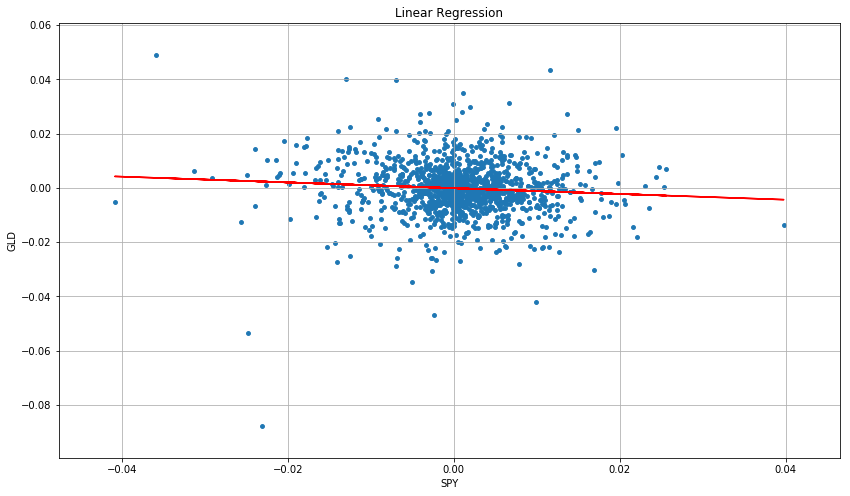

Beta: -0.11 Alpha: -0.00015
GLD correlation: -0.0810823614143


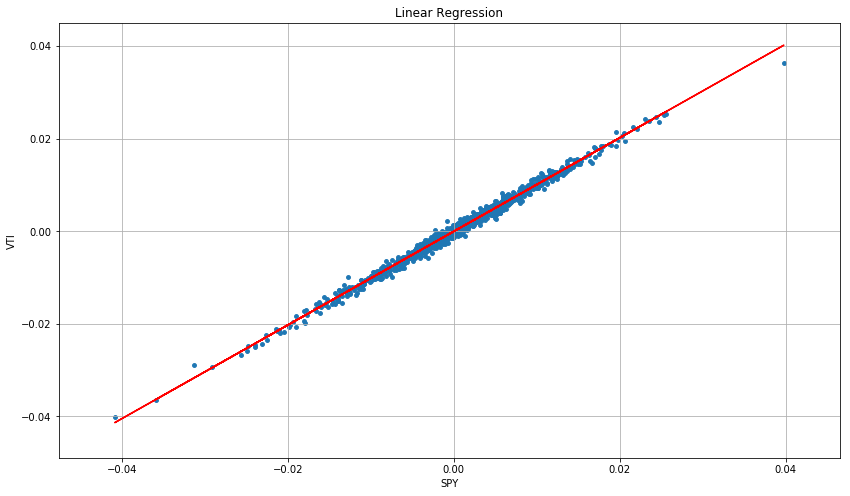

Beta: 1.01 Alpha: -0.0
VTI correlation: 0.995243366239


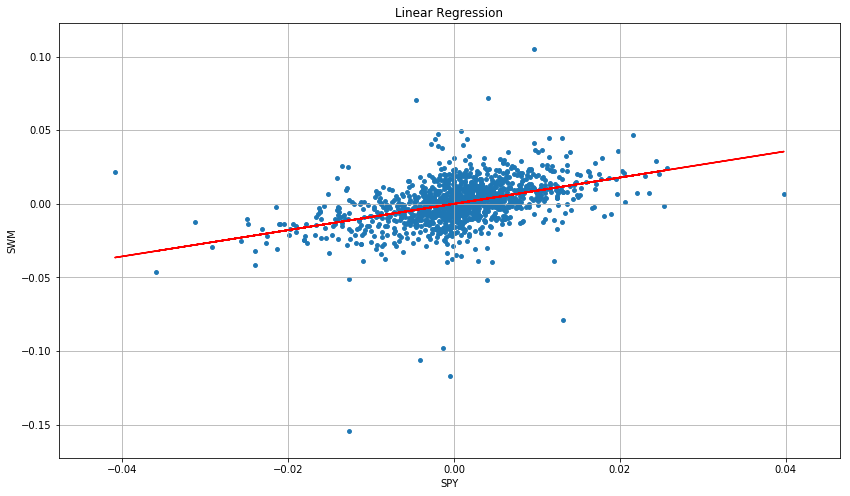

Beta: 0.89 Alpha: -4e-05
SWM correlation: 0.422720305008


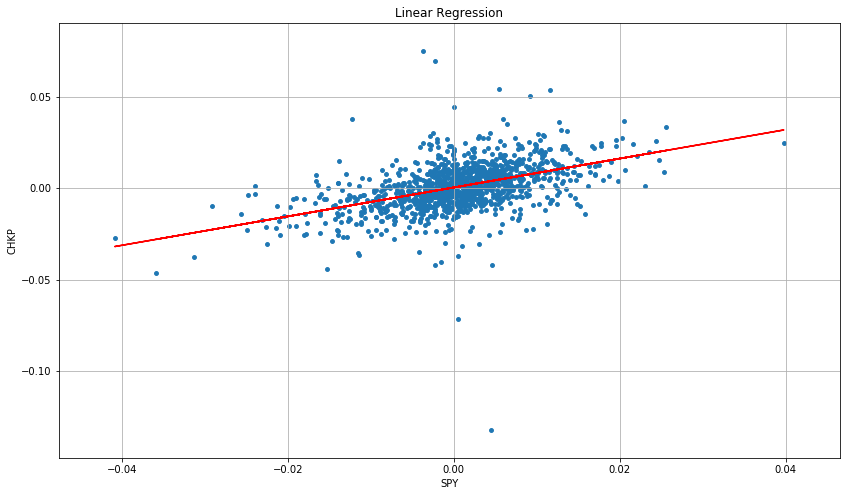

Beta: 0.79 Alpha: 0.00037
CHKP correlation: 0.461359091349


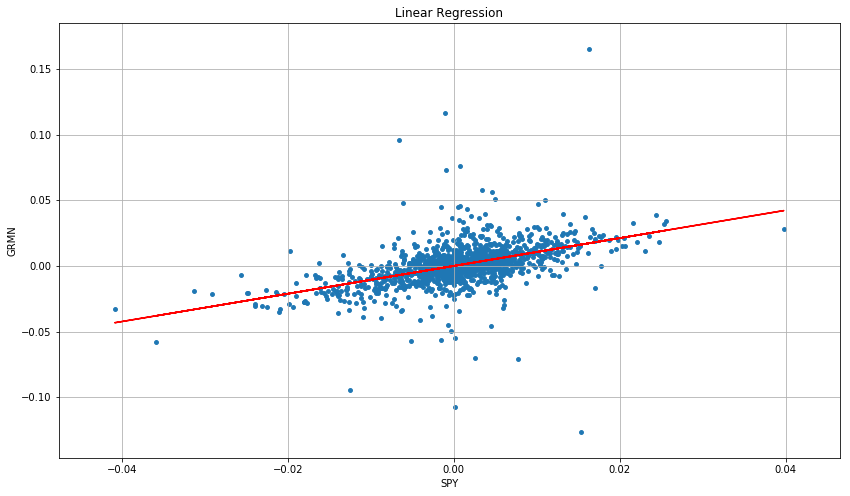

Beta: 1.06 Alpha: -2e-05
GRMN correlation: 0.480811015339


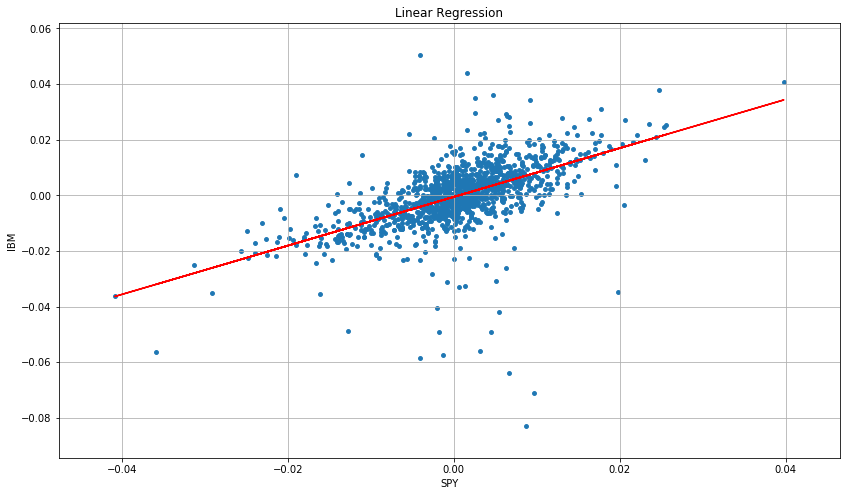

Beta: 0.88 Alpha: -0.00059
IBM correlation: 0.576937672268


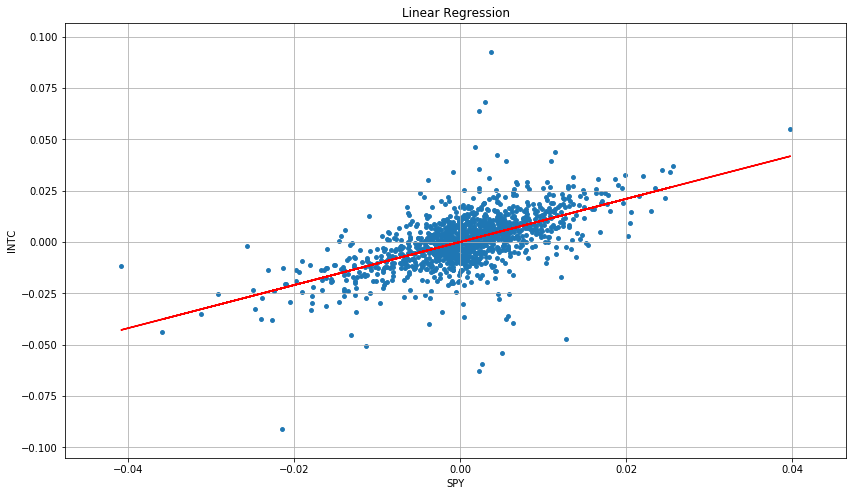

Beta: 1.05 Alpha: 9e-05
INTC correlation: 0.593581929624


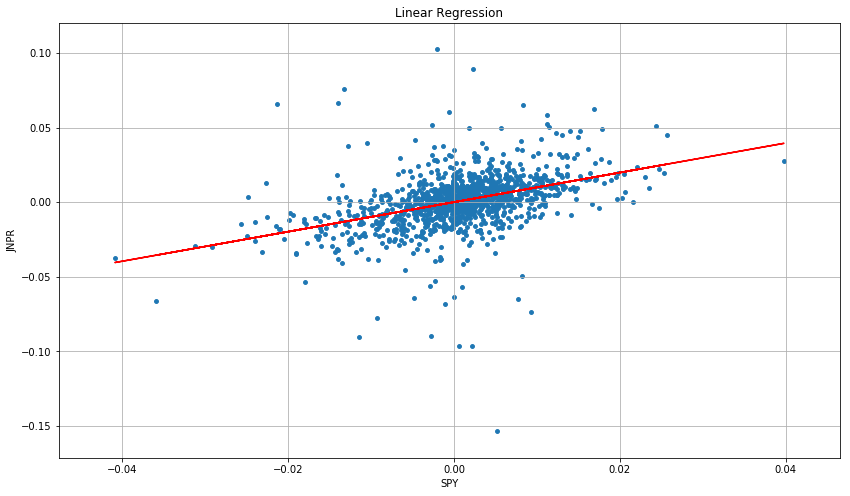

Beta: 0.99 Alpha: -0.0
JNPR correlation: 0.417906935215


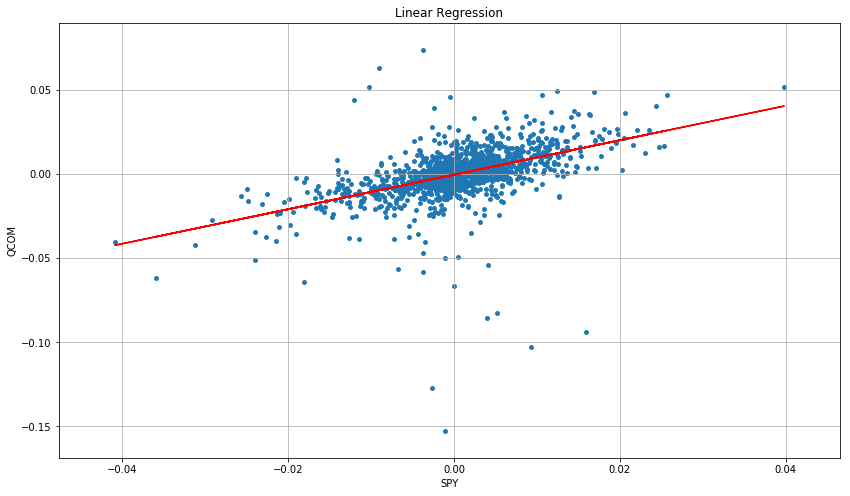

Beta: 1.03 Alpha: -0.00042
QCOM correlation: 0.502572896675


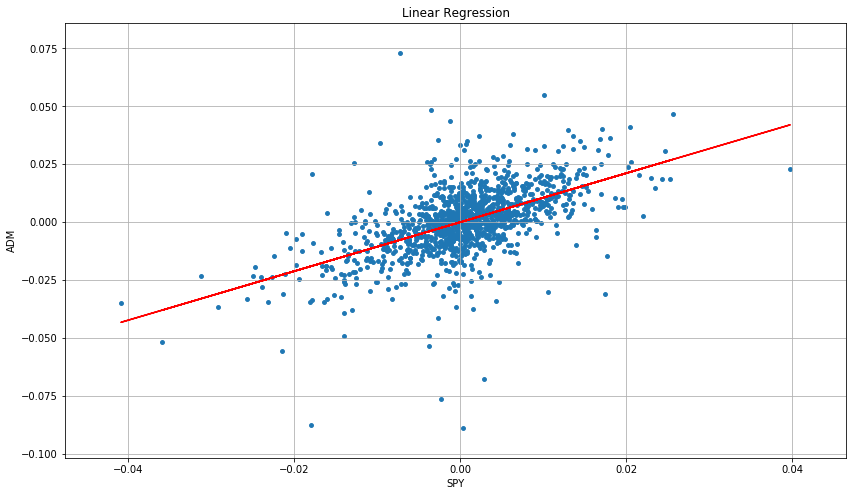

Beta: 1.06 Alpha: -6e-05
ADM correlation: 0.56008788305


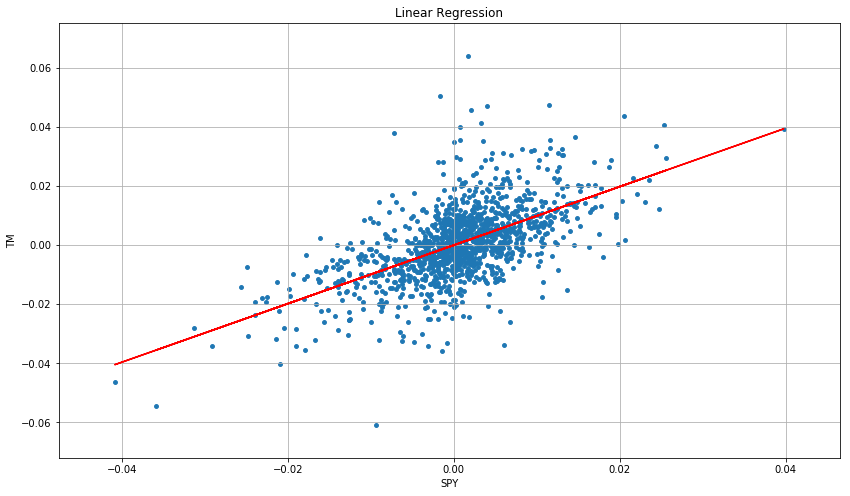

Beta: 0.99 Alpha: -1e-05
TM correlation: 0.59191588877


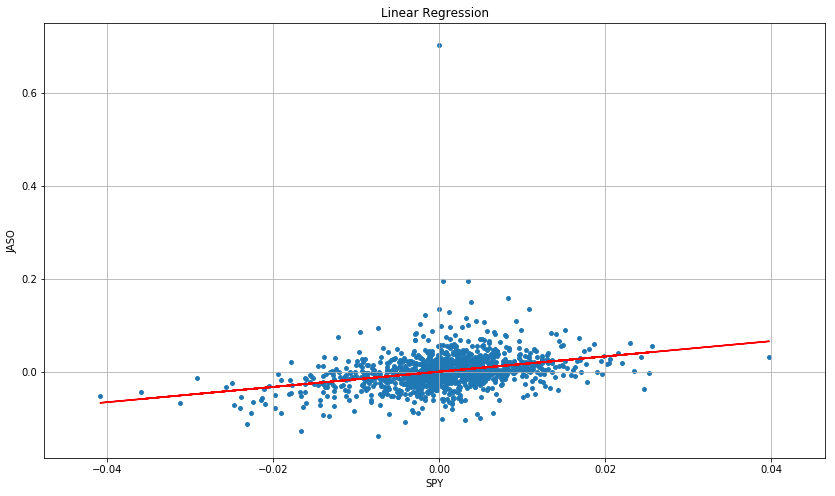

Beta: 1.64 Alpha: 0.00028
JASO correlation: 0.31640603622


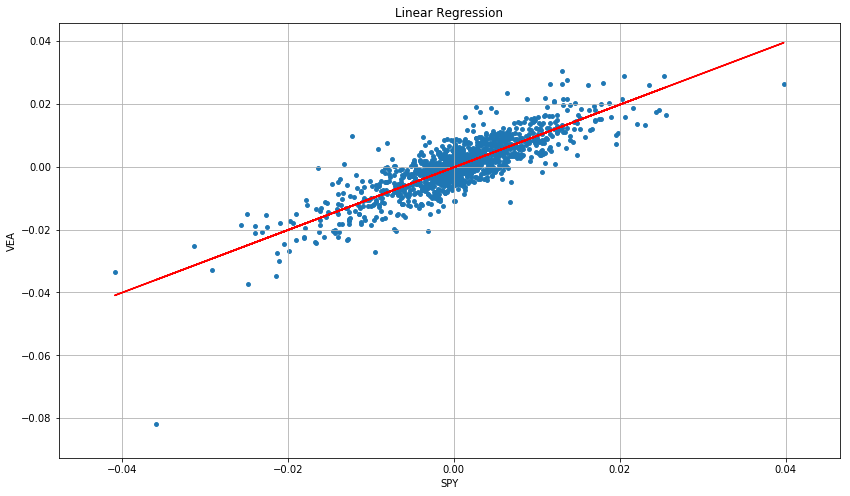

Beta: 1.0 Alpha: -0.00019
VEA correlation: 0.845532400539


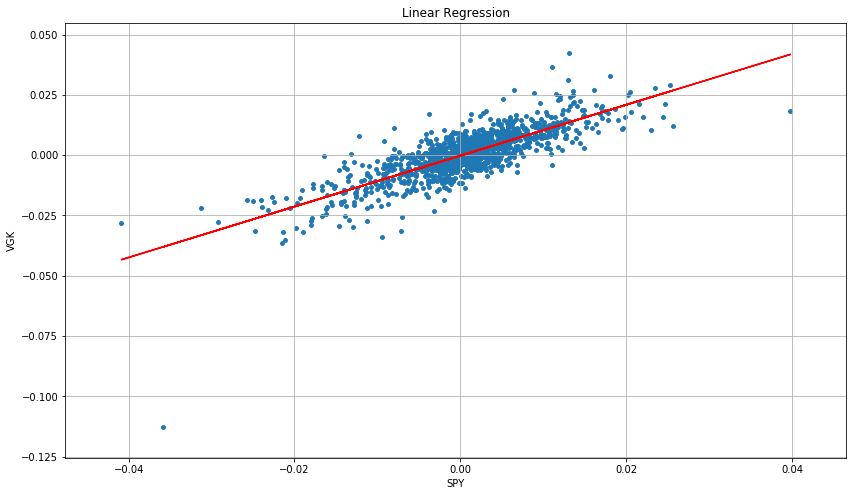

Beta: 1.06 Alpha: -0.00022
VGK correlation: 0.799232968822


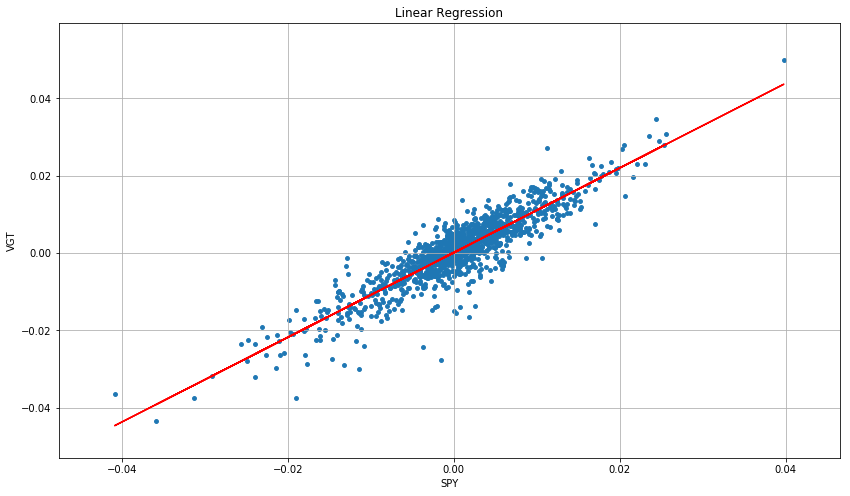

Beta: 1.09 Alpha: 0.0001
VGT correlation: 0.898785458041


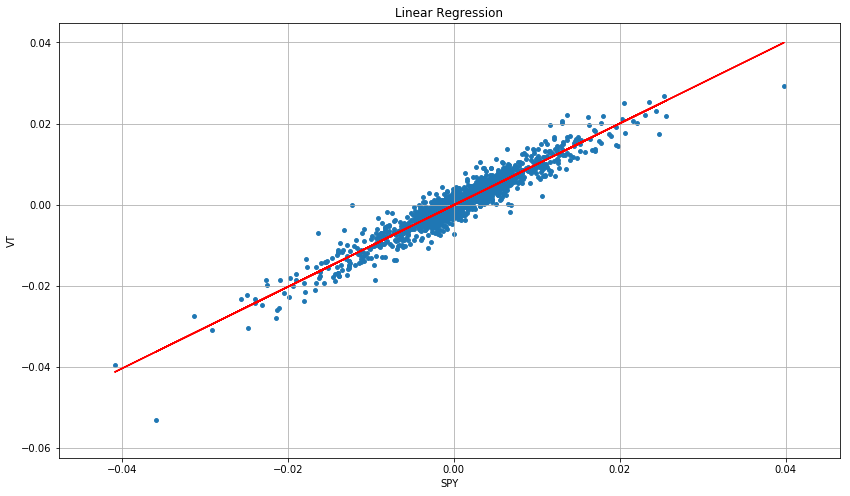

Beta: 1.01 Alpha: -0.00013
VT correlation: 0.953854018519


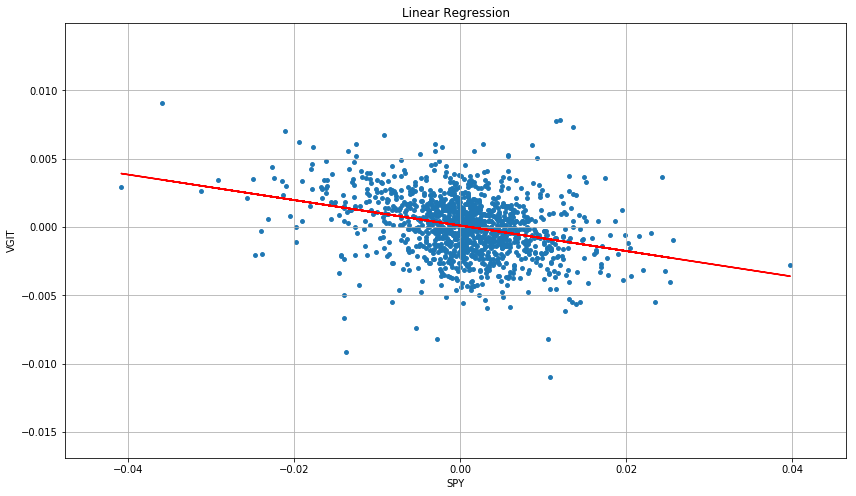

Beta: -0.09 Alpha: 0.0001
VGIT correlation: -0.317709495763


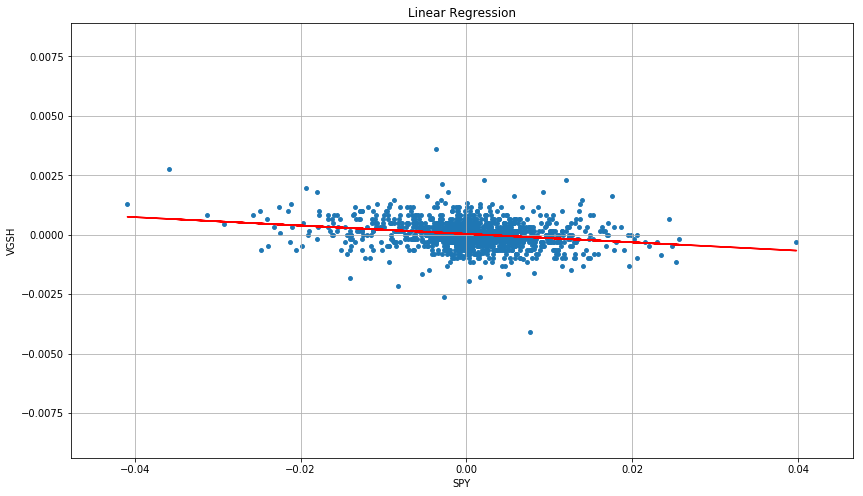

Beta: -0.02 Alpha: 3e-05
VGSH correlation: -0.231479752007


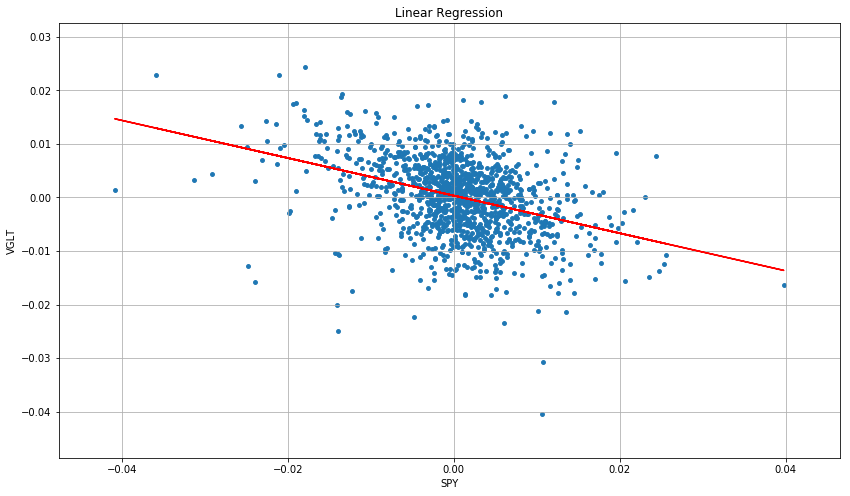

Beta: -0.35 Alpha: 0.00034
VGLT correlation: -0.370766223381


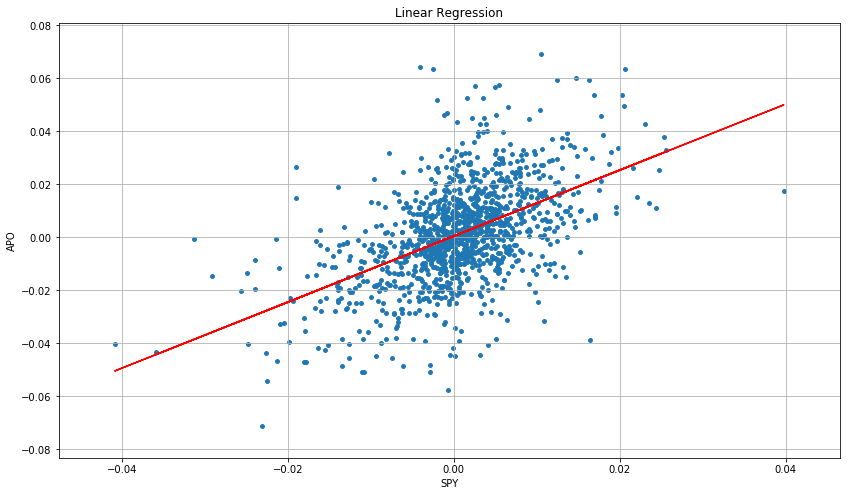

Beta: 1.24 Alpha: 0.00047
APO correlation: 0.5147790173


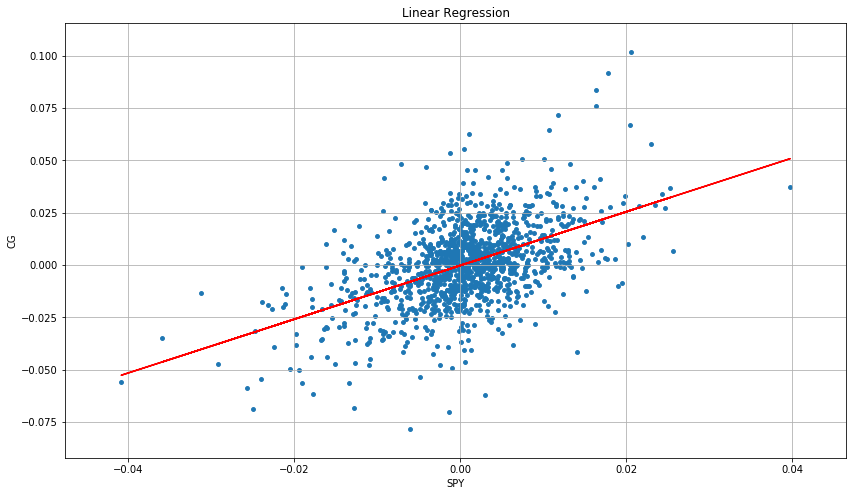

Beta: 1.28 Alpha: -0.00028
CG correlation: 0.506598912244


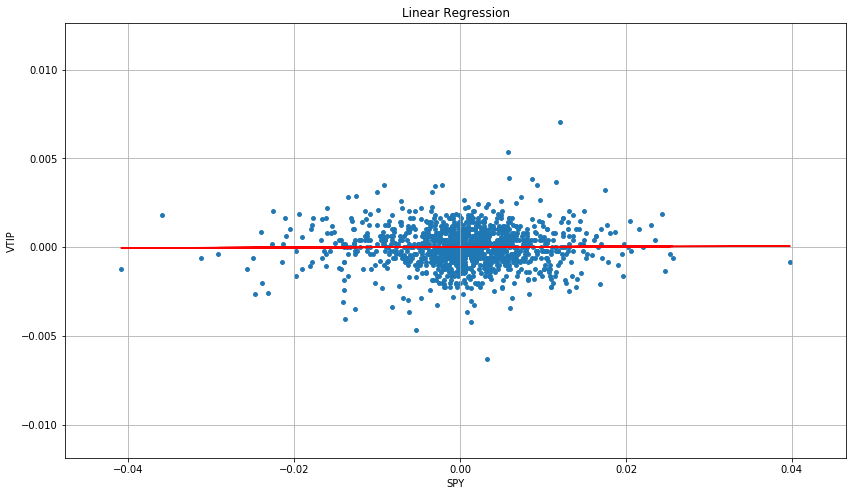

Beta: 0.0 Alpha: 1e-05
VTIP correlation: 0.00879787941625


In [29]:
plot_regerssion(coefficients_all, daily_returns_all)